<a href="https://colab.research.google.com/github/akhadangi/EM-stellar/blob/master/EM_stellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EM-stellar**

<font size = 4>This notebook represents the implementation of the [**EM-stellar**](https://www.biorxiv.org/content/10.1101/2020.07.15.203836v1). Deep learning (DL) methods offer an exciting opportunity to automate the segmentation process by learning from manual annotations of a small sample of EM data. While many DL methods are being rapidly adopted to segment EM data no benchmark analysis has been conducted on these methods to date. We present EM-stellar as a platform that can be used to benchmark the performance of a range of state-of-the-art DL methods on user-provided datasets. 



---
<font size = 4>Papers related to this Notebook: 

- <font size = 3>**EM-stellar: benchmarking deep learning for electron microscopy image segmentation** by *Afshin Khadangi, Thomas Boudier, Vijay Rajagopal*  (https://www.biorxiv.org/content/10.1101/2020.07.15.203836v1)

- <font size = 3>**EM-net: Deep learning for electron microscopy image segmentation** by *Afshin Khadangi, Thomas Boudier, Vijay Rajagopal*  (https://www.biorxiv.org/content/10.1101/2020.02.03.933127v1)


<font size = 4>**Please cite** [**this original paper**](https://www.biorxiv.org/content/10.1101/2020.07.15.203836v1) **when using or developing this notebook.**

---

###**Structure of a notebook**

<font size = 2> This cell is adapted from the [ZeroCostDL4Mic](https://github.com/HenriquesLab/ZeroCostDL4Mic).

---
<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 3> **Important:** Make sure that all of the images are equal in size, both in $x$ and $y$. For example, suppose that you have segmented your test data with [**EM-net**](https://github.com/akhadangi/EM-net) by trying a variety of the networks, and you aim at benchmarking these methods by retrieving a wide range of evaluation metrics. Let's say that you have tried segmenting your test images on U-net, VGG and ResNet with the following image sizes:
*   $256$ x $512$

<font size = 3>You have also previously tried EM-net v1 and v2 2x with the following image sizes: 
*   $512$ x $512$

<font size = 3>Supposing these different patches have overlapping areas, then you will need to extract those areas before using EM-stellar. Let's suppose that these two different datasets share an area of $128$ x $128$. Hence you will need to extract these overlapping patches before using this platform.

<font size = 3> **Important:** Make sure that you have saved your patches in the ***.png** format.
0. Create a folder called "Main".
1. Create two sub folders `test_segmentation_results` and `ground_truth_segmentation_masks` within the "Main" folder in the following format and upload them into your google drive:

<span style="color:blue">some *This is Blue italic.* text</span>

*   **drive**
    - **Main**
      - ***test_segmentation_results***
        - U-net
          - *result_1.png*, *result_2.png*, ...
        - VGG
          - *result_1.png*, *result_2.png*, ...
        - EM-net v1 BN
          - *result_1.png*, *result_2.png*, ...
        - ResNet
          - *result_1.png*, *result_2.png*, ...
        - ...
      - ***ground_truth_segmentation_masks***
        - *mask_1.png*, *mask_2.png*, ...
    

2. Place the segmentation result images (e.g. predicted by the networks) in the corresponding folder (for example folder `u-net`) and put all these folders to **test_segmentation_results** folder.
3. Place all your ground-truth images in the **ground_truth_segmentation_masks** folder. This folder contains the binary masks that we want to compare the predictions of the methods with. Hence, it is different from the validation data as the validation data is sampled from the training data that you have already performed during the training.


## **1.1 Change the Runtime**
---

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator:** *This notebook is accelerator free! Select the `None` as type of the accelerator.*


## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install EM-stellar Dependencies**
---

In [ ]:
%%capture
#@markdown ##Play to install EM-stellar standard dependencies
# import logging, os

# logging.disable(logging.WARNING)

# importing os to set environment variable
import os
!pip install tqdm

# install openjdk for java and set ENV variable
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
print("1/7: Installed Java openjdk 8.")
# install maven
!sudo apt-get install maven
print("2/7: Installed maven.")

# install imglyb
!pip install imglyb==0.3.5
print("3/7: Installed imglyb.")

# install pyimagej
!pip install pyimagej
print("4/7: Installed pyimagej (for FiJi use).")

# install pyjnius (python library to access java classes)
!wget https://anaconda.org/conda-forge/pyjnius/1.2.0/download/linux-64/pyjnius-1.2.0-py36hc2cfd8d_0.tar.bz2 && tar -xjf pyjnius-1.2.0-py36hc2cfd8d_0.tar.bz2 -C /usr/local
print("5/7: Installed pyjnius (python wrapper for Java).")

print("Downloading latest version of FiJi ...")


In [ ]:
%%capture
%%bash
#@markdown ##Play to install FiJi (ImageJ)

wget https://downloads.imagej.net/fiji/latest/fiji-linux64.zip && unzip fiji-linux64.zip


cd Fiji.app/
./ImageJ-linux64 --update add-update-site clij2 https://sites.imagej.net/clij2/
./ImageJ-linux64 --update add-update-site clij https://sites.imagej.net/clij/
./ImageJ-linux64 --update update

# **3. Select your paths**

---

<font size = 5> **Paths for segmentation results and ground-truth binary masks**

<font size = 4>**`segmentation_results`, `ground_truth_binary_masks`:** These are the folders containing your segmentation results (e.g. predictions from networks) and ground-truth binary masks files (manually annotated masks). Enter the path to the source and target images for training. **These should be located in the same parent folder.**

<font size = 4>**Make sure the directories exist before entering them!**

<font size = 5> **Select benchmarking metrics**

<font size = 4>**metrics**: choose the metrics that you want to use for benchmarking different networks that you have used for segmenting test data.

---
<font size = 4>**Caution!** If you run this notebook **for the first time**, you will need to run the following cell twice as some dependency issues of ImageJ with the Colab. Run the following cell and if you encounter an error, please Go to **Runtime -> Restart runtime**. Once it has been restarted, please run the following cell again until you see the output `FiJi has been loaded successfully!`.
You won't need to re-run the previous cells after restarting the runtime as they have been already cached on the Colab.


In [ ]:
#@markdown ###Path to training images:
# import imagej
import os
os.environ["PYJNIUS_JAR"] = "/usr/local/share/pyjnius/pyjnius.jar"
import imagej;
ij = imagej.init("Fiji.app");
print('FiJi has been loaded successfully!')
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
import os
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, jaccard_score
from skimage.io import imread_collection, imsave
import glob
from PIL import Image
import seaborn as sns

import shutil
segmentation_results = '/content/gdrive/My Drive/Images/Networks outputs' #@param {type:"string"}

#We find the name of the base_directory
path = Path(segmentation_results)
base_directory = '/'+(str(path.parent))

ground_truth_binary_masks = '/content/gdrive/My Drive/Images/Groundtruth' #@param {type:"string"}
#We assign a temporary directory to just include the stacked images
Temp_dir = base_directory + '/Temp'

#Cleaning up pre-existing directories, if any!
if os.path.exists(Temp_dir):
  shutil.rmtree(Temp_dir)

#Creating new directories
os.mkdir(Temp_dir)


#@markdown ###Select the metrics that you want to evaluate inference results with:

V_Rand = True #@param {type:"boolean"}
V_Info = True #@param {type:"boolean"}
Standard_metrics = True #@param {type:"boolean"}

FiJi has been loaded successfully!
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **4. Visualise the metrics**

---

<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source`, `Training_target`:** These are the folders containing your source (e.g. EM images) and target files (segmentation masks). Enter the path to the source and target images for training. **These should be located in the same parent folder.**

<font size = 4>**`Patch_width`, `Patch_height`:** Training deep neural networks requires lots of computaional resources including **memory**. Feeding larger image data size to the network can exhaust the resources. Such a limitation can be handled by reducing the input image size. Hence, we have provided **patch training** which enables the user to overcome this limitation. You can simply upload the training images with any size, and set the patch size by controlling these two parameters. **The larger patch size will require higher memory.**

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. If you want to use a previously trained model, enter the name of the pretrained model (which should be contained in the trained_model -folder after training).

<font size = 4>**`model_path`**: Enter the path of the folder where you want to save your model.

**Make sure the directories exist before entering them!**

<font size = 5> **Select training parameters**

<font size = 4>**`epochs`**: Choose more epochs for larger training sets. Observing how much the loss reduces between epochs during training may help determine the optimal value. **Default: 50**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`batch_size`**: This parameter describes the amount of images that are loaded into the network per step. Smaller batchsizes may improve training performance slightly but may increase training time. If the notebook crashes while loading the dataset this can be due to a too large batch size. Decrease the number in this case. **Default: 2**

<font size = 4>**`loss_functions`**: Training performance depends strongly on the loss function. To find out more about losses, see: https://keras.io/losses/. **Default: binary_crossentropy**

<font size = 4>**`optimizer`**: Training performance depends strongly on the optimiser as well. To find out more about optimizers, see: https://keras.io/optimizers/. **Default: Rectified Adam**




In [ ]:
#@markdown ##4.1. Play to retrieve the evaluation metrics values
import logging, os
from tqdm.autonotebook import tqdm

for root, dirs, files in os.walk(segmentation_results, topdown=True):
  if (len(dirs)>0):
    childdirs = dirs
parentdir = [ground_truth_binary_masks, segmentation_results]

childdirs_imgs = []
print("iterating the segmentation results directories ...")
for item in tqdm(childdirs):
    tmp = np.asarray(list(imread_collection(parentdir[1]+"/"+item+"/*.png")),dtype='float32')
    if (np.max(tmp)>1):tmp=tmp/255.0
    childdirs_imgs.append(tmp)
    tmp = np.vstack((tmp,tmp))
    imsave(Temp_dir+'/'+item+'.tif',tmp)
Ground_data = np.asarray(list(imread_collection(parentdir[0]+"/*.png")),dtype='float32')
Ground_dataTmp = np.vstack((Ground_data,Ground_data))
zipdata = zip(childdirs, childdirs_imgs)
mydict = dict(zipdata)
if (np.max(Ground_data)>1):Ground_data=Ground_data/255.0
if (np.max(Ground_dataTmp)>1):Ground_dataTmp=Ground_dataTmp/255.0
imsave(Temp_dir+'/Ground.tif',Ground_dataTmp)


Language_extension = "BeanShell"

macroVRand = """
import trainableSegmentation.metrics.*;
#@output String VRand
metric = new RandError( originalLabels, proposedLabels );
maxThres = 1.0;
maxScore = metric.getMaximalVRandAfterThinning( 0.0, maxThres, 0.1, true );  
VRand = maxScore;
"""

macroVInfo = """
import trainableSegmentation.metrics.*;
#@output String VInfo
metric = new VariationOfInformation( originalLabels, proposedLabels );
maxThres =1.0;
maxScore = metric.getMaximalVInfoAfterThinning( 0.0, maxThres, 0.1 );  
VInfo = maxScore;
"""
current_path = Temp_dir
VRandDf = []
VInfoDf = []
if (V_Rand or V_Info):
  print("Retrieving Rand/Info metrics for the networks ...")
for item in tqdm(childdirs):
  if (V_Rand):
    macroVRandTmp = ('\nimport ij.IJ;\noriginalLabels=IJ.openImage("' + current_path + '/' + 'Ground' + '.tif");' +
                  '\nproposedLabels=IJ.openImage("' + current_path + '/' + item + '.tif");' + macroVRand)
    VRand = float(ij.py.run_script(Language_extension, macroVRandTmp).getOutput('VRand'))
    VRandDf.append(VRand)
  if (V_Info):
    macroVInfoTmp = ('\nimport ij.IJ;\noriginalLabels=IJ.openImage("' + current_path + '/' + 'Ground' + '.tif");' +
                  '\nproposedLabels=IJ.openImage("' + current_path + '/' + item + '.tif");' + macroVInfo)
    VInfo = float(ij.py.run_script(Language_extension, macroVInfoTmp).getOutput('VInfo'))
    VInfoDf.append(VInfo)

  
if (Standard_metrics):
  print("Retrieving standard metrics for the segmentation results ...")
  Ground = Ground_data.flatten()
  Ground = (Ground > 0.5).astype(np.int_)
  F1score = []
  accuracy = []
  sensitivity = []
  specificity = []
  PPV = []
  NPV = []
  Jaccard = []
  for item in tqdm(mydict):
      itemTmp = mydict[item]
      itemTmp = (itemTmp > 0.5).astype(np.int_)
      itemTmp = itemTmp.flatten()
      tn, fp, fn, tp = confusion_matrix(Ground, itemTmp).ravel()
      accuracy.append((tp+tn)/(tp+tn+fp+fn))
      sn = tp/(tp+fn)
      sensitivity.append(sn)
      specificity.append(tn/(tn+fp))
      pr = tp/(tp+fp)
      PPV.append(pr)
      NPV.append(tn/(tn+fn))
      Jaccard.append(jaccard_score(Ground, itemTmp))
      F1score.append(2*(pr*sn)/(pr+sn))    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until


iterating the segmentation results directories ...



Retrieving Rand/Info metrics for the networks ...



Retrieving standard metrics for the segmentation results ...


## **4.2. Visualisation**
---

In [ ]:
#@markdown ###4.2.1 Play to visualise the tabular report
import logging, os
if (V_Rand and V_Info and Standard_metrics):
  MyDataFrameDict = {'Network': childdirs,
          'F1-score': F1score,
          'VRand': VRandDf,
          'VInfo': VInfoDf,
          'accuracy': accuracy,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'PPV': PPV,
          'NPV': NPV,
          'Jaccard': Jaccard
          }
elif (V_Rand and V_Info):
  MyDataFrameDict = {'Network': childdirs,
          'VRand': VRandDf,
          'VInfo': VInfoDf
          }
elif (V_Rand and Standard_metrics):
  MyDataFrameDict = {'Network': childdirs,
          'F1-score': F1score,
          'VRand': VRandDf,
          'accuracy': accuracy,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'PPV': PPV,
          'NPV': NPV,
          'Jaccard': Jaccard
          }
elif (V_Info and Standard_metrics):
  MyDataFrameDict = {'Network': childdirs,
          'F1-score': F1score,
          'VInfo': VInfoDf,
          'accuracy': accuracy,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'PPV': PPV,
          'NPV': NPV,
          'Jaccard': Jaccard
          }
elif (Standard_metrics):
  MyDataFrameDict = {'Network': childdirs,
          'F1-score': F1score,
          'accuracy': accuracy,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'PPV': PPV,
          'NPV': NPV,
          'Jaccard': Jaccard
          }
elif (V_Info):
  MyDataFrameDict = {'Network': childdirs,
          'VInfo': VInfoDf
          }
elif (V_Rand):
  MyDataFrameDict = {'Network': childdirs,
          'VRand': VRandDf
          }

df = pd.DataFrame(MyDataFrameDict, index=childdirs, columns = ['F1-score', 'VRand', 'VInfo', 'accuracy', 'sensitivity', 
                                                  'specificity', 'PPV', 'NPV', 'Jaccard'])
df = df.round(decimals=5)

cm = sns.diverging_palette(20, 130, n = len(childdirs), l=70, as_cmap=True)


styles = [
    dict(props=[("font-family", "Times New Roman"),
                               ("text-align", "center")])
]
pd.set_option('precision', 5)
df.sort_index(axis=0, inplace = True)
html = (df.style.set_table_styles(styles).background_gradient(cmap=cm))
html

,F1-score,VRand,VInfo,accuracy,sensitivity,specificity,PPV,NPV,Jaccard
CDeep3M,0.96607,0.96485,0.96845,0.97450,0.99303,0.96383,0.94054,0.99585,0.93437
EM-net V1 2x,0.97390,0.97961,0.97815,0.98108,0.96566,0.98997,0.98228,0.98041,0.94913
EM-net V1 4x,0.97289,0.93384,0.95655,0.98035,0.96465,0.98940,0.98128,0.97983,0.94722
EM-net V1 BN,0.97468,0.95974,0.96392,0.98153,0.97254,0.98671,0.97683,0.98422,0.95061
EM-net V1 BN 2x,0.97223,0.98270,0.97845,0.97986,0.96450,0.98871,0.98008,0.97974,0.94596
EM-net V2,0.96445,0.96822,0.96095,0.97452,0.94567,0.99114,0.98399,0.96939,0.93135
EM-net V2 2x,0.97219,0.97179,0.96931,0.97985,0.96393,0.98901,0.98060,0.97942,0.94589
EM-net V2 4x,0.97353,0.97360,0.97557,0.98079,0.96659,0.98897,0.98057,0.98091,0.94842
PReLU-net,0.94828,0.88123,0.92011,0.96284,0.93193,0.98065,0.96522,0.96155,0.90165
ResNet,0.96320,0.96219,0.96586,0.97286,0.97174,0.97350,0.95481,0.98355,0.92901


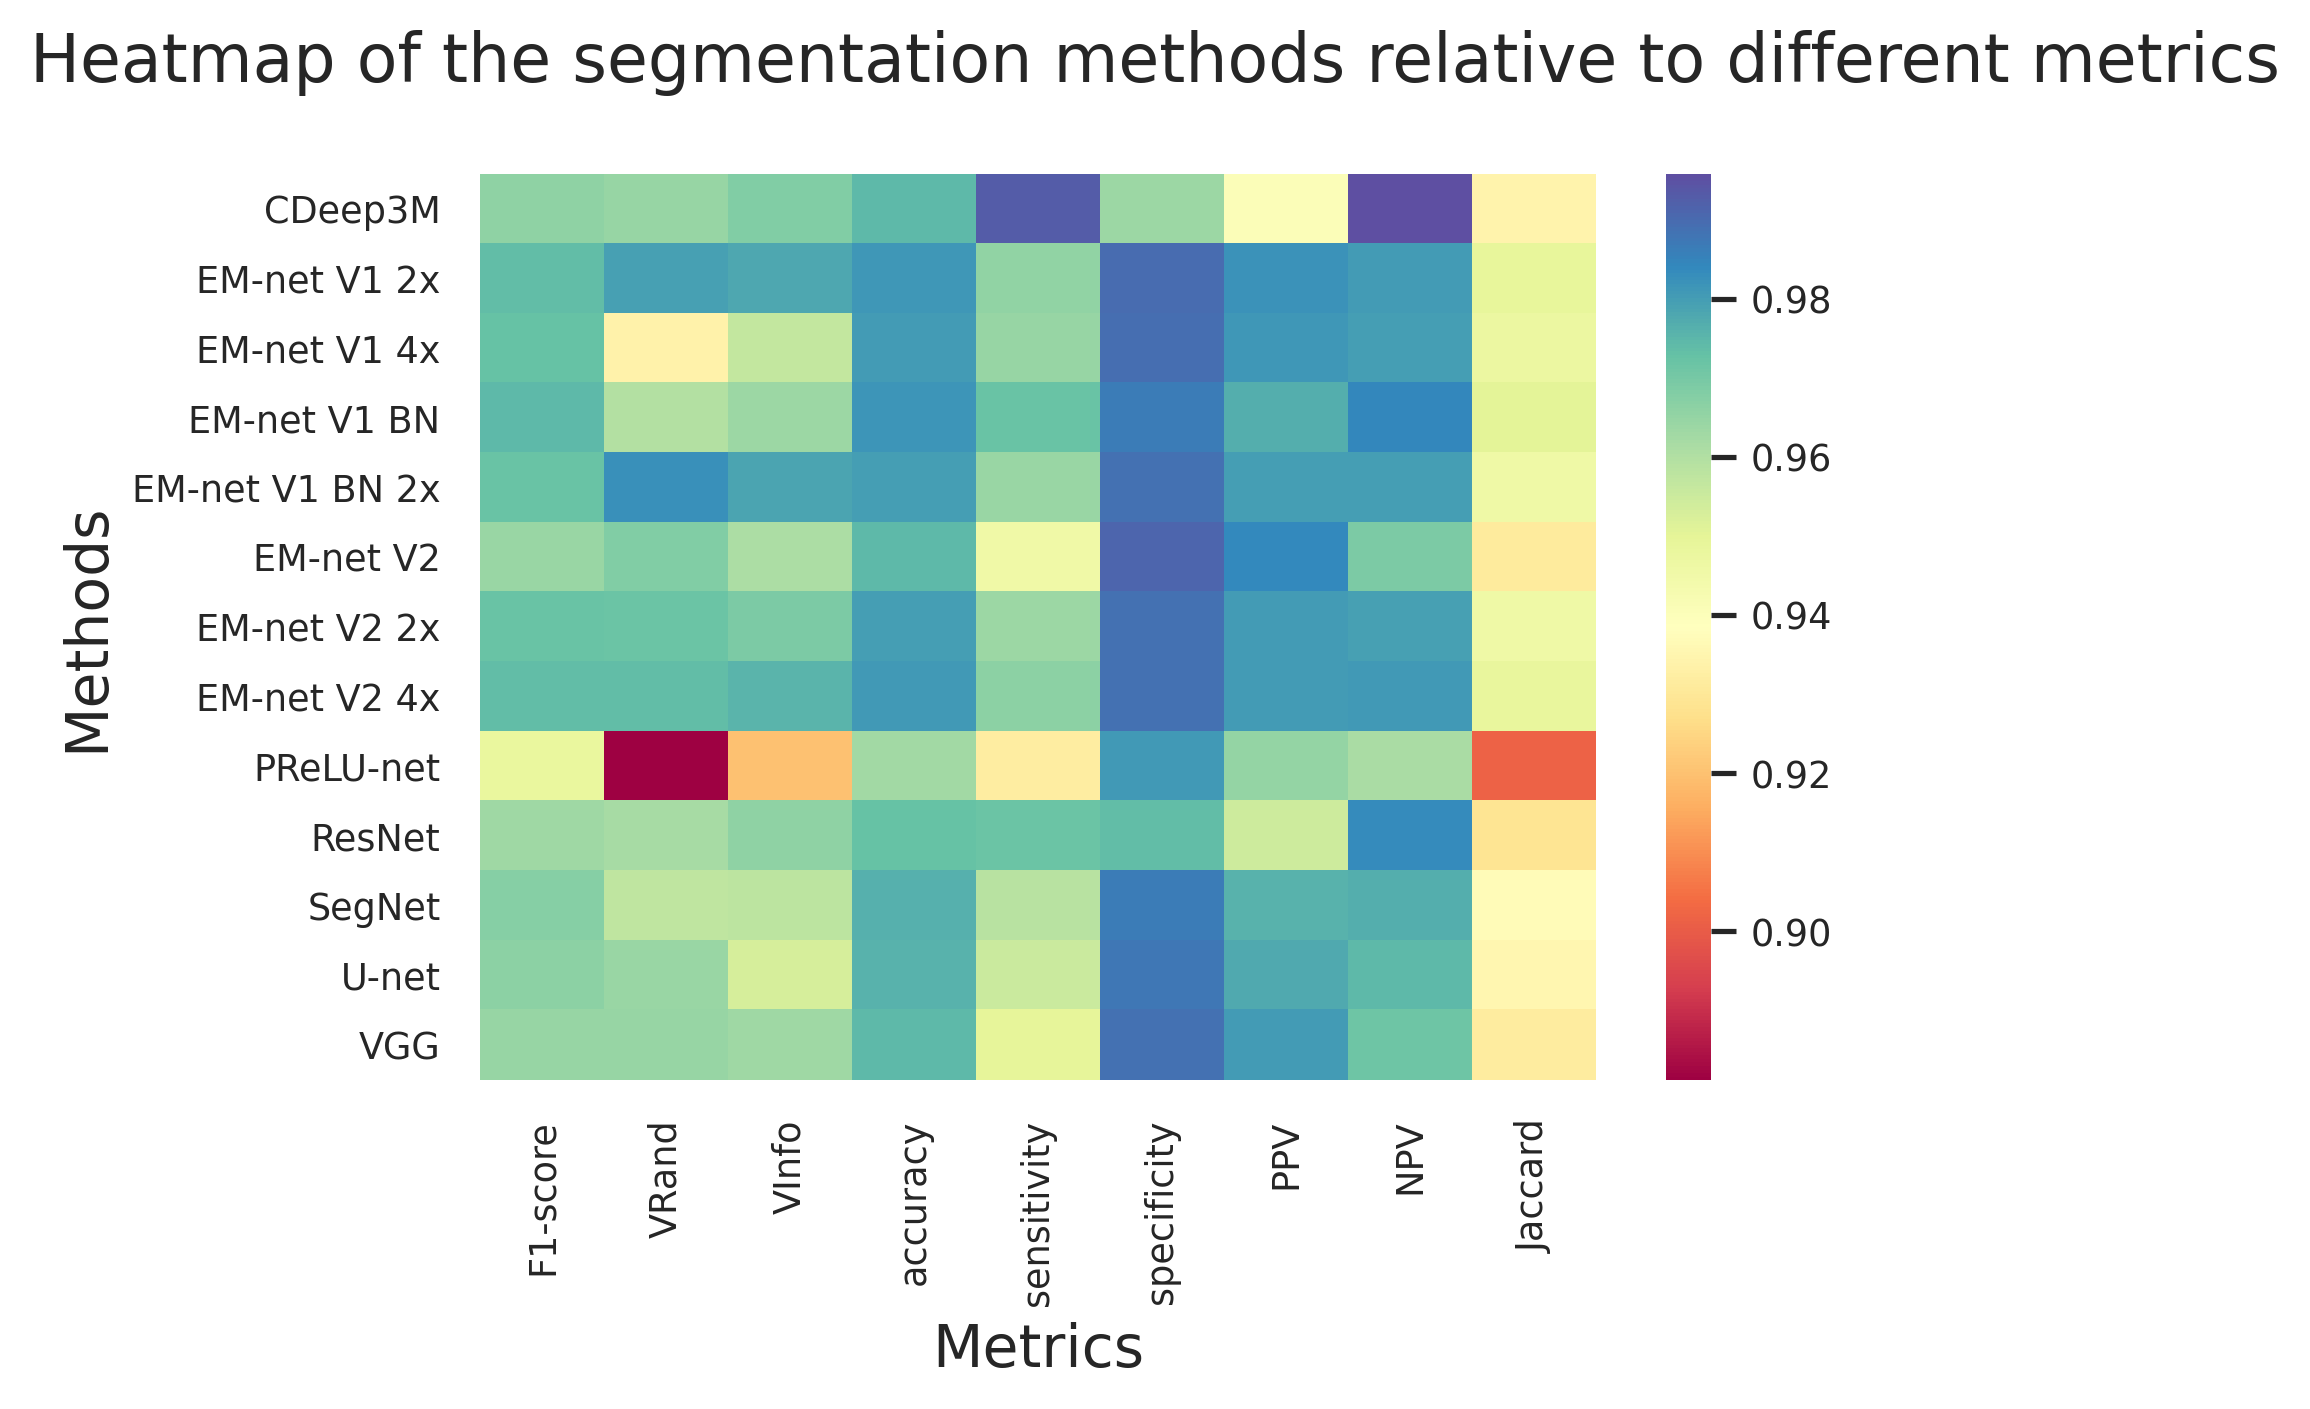

In [ ]:
#@markdown ###4.2.2 Play to visualise the heatmap report
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=300)
sns.set(font_scale=0.8, font="sans-serif")
csfont = {'fontname':'sans-serif'}
heat_map = sns.heatmap(df, cmap="Spectral")
plt.suptitle("Heatmap of the segmentation methods relative to different metrics", fontsize=16, y=1)
plt.xlabel("Metrics", fontsize=14, **csfont)
plt.ylabel("Methods", fontsize=14, **csfont)
plt.show()